In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

* explore dataframe

In [3]:
df2=df.copy()
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# df2=df2.drop(columns='Genre')
df2['Genre']=df2['Genre'].replace(['Male','Female'],[1,0])
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in the case because we take only the last two columns and they have similar scale.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [6]:
df2_scaled.shape
pd.DataFrame(df2_scaled, columns=df2.columns).head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [8]:
XX= df2.iloc[:,-2:].values

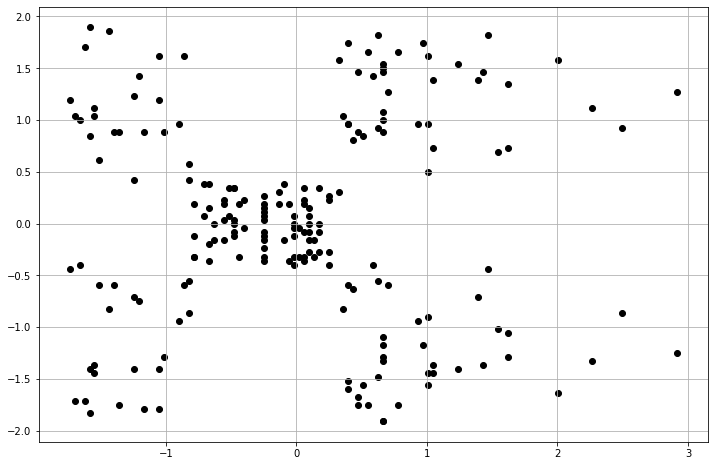

In [9]:
# elbow rule
plt.scatter(df2_scaled[:,3],
            df2_scaled[:,4],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [26]:
sc = StandardScaler()
X_sc = sc.fit_transform(XX)

In [10]:
def plot_distortion(X,max_clusters = 15):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show() 

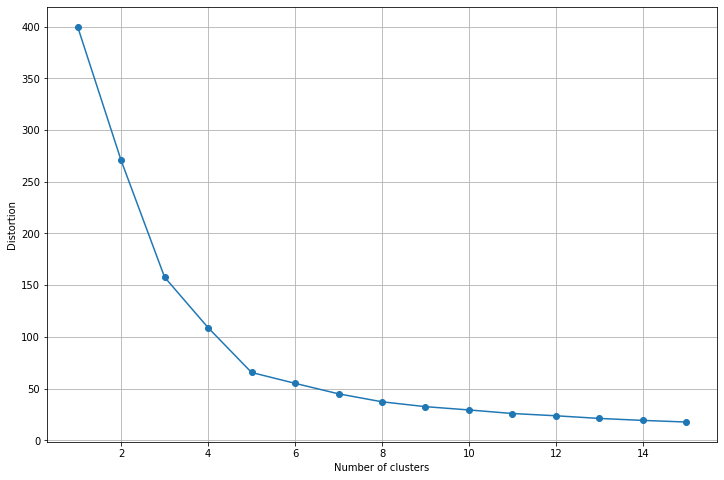

In [27]:
plot_distortion(X_sc)

* fit model with optimal number of clusters

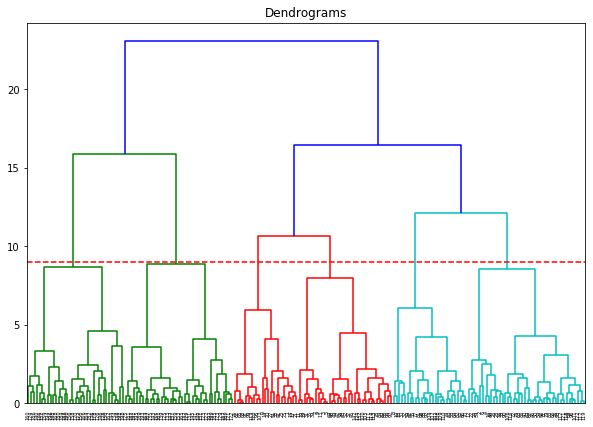

In [51]:
# import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pd.DataFrame(df2_scaled, columns=df2.columns), method='ward'))
plt.axhline(y=9, color='r', linestyle='--')

In [23]:
# from graph elbow range is btw 4-7
kmeans = KMeans( n_clusters = 6, init='k-means++',random_state=0)
pred = kmeans.fit_predict(XX)

In [69]:
# cluster4
# 1    66
# 3    59
# 0    39
# 2    36
frame = pd.DataFrame(df2)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    40
0    39
3    34
1    34
2    29
5    24
Name: cluster, dtype: int64

* define function plot_clusters

In [13]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

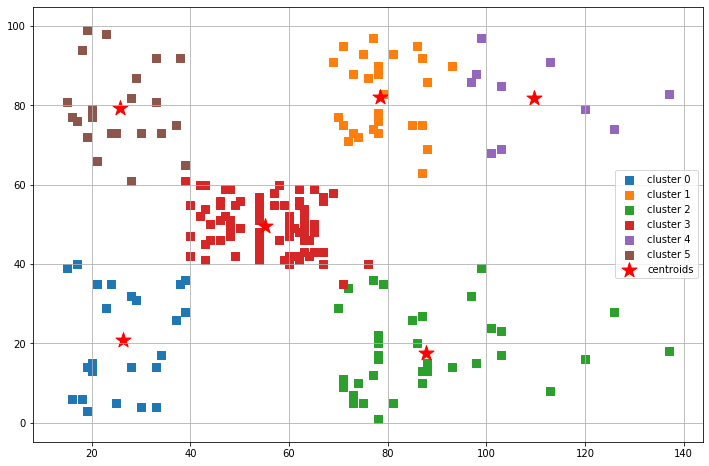

In [24]:
plot_clusters(XX, pred, plt_cluster_centers= True)
#cluster5 is good